tamanho da imagem (707L, 1000L, 3L)
puzzle


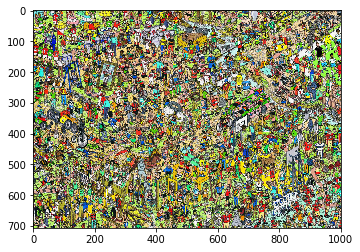

apenas pixels vermelhos


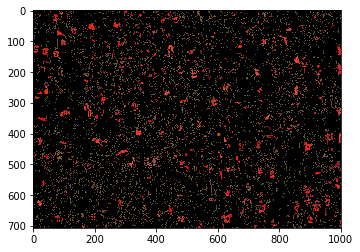

pequenos pixels filtrados


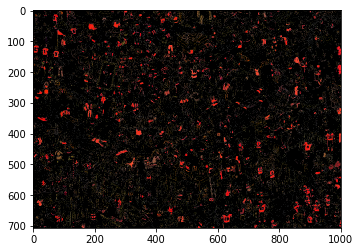

imagem binarizada


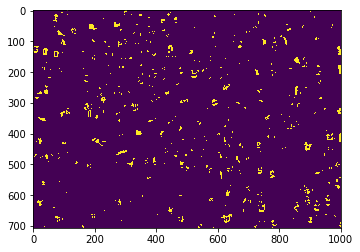

(103, 590) (113, 595) [10  5]
(933, 281) (944, 286) [11  5]
(735, 516) (747, 522) [12  6]
(742, 512) (755, 518) [13  6]
(748, 508) (762, 515) [14  7]
(936, 277) (951, 284) [15  7]
(753, 502) (769, 510) [16  8]
(757, 496) (774, 504) [17  8]
(759, 490) (777, 499) [18  9]
(941, 271) (960, 280) [19  9]
(519, 199) (539, 209) [20 10]
(528, 191) (549, 201) [21 10]
(530, 183) (552, 194) [22 11]
(537, 175) (560, 186) [23 11]
(37, 240) (61, 252) [24 12]
(580, 286) (605, 298) [25 12]
(539, 164) (565, 177) [26 13]
(541, 155) (568, 168) [27 13]
(622, 660) (650, 674) [28 14]
(622, 662) (651, 676) [29 14]
(958, 394) (988, 409) [30 15]
(637, 652) (668, 667) [31 15]
(914, 621) (946, 637) [32 16]
(916, 607) (949, 623) [33 16]
(918, 609) (952, 626) [34 17]
(928, 596) (963, 613) [35 17]
(934, 580) (970, 598) [36 18]
(946, 585) (983, 603) [37 18]
(950, 569) (988, 588) [38 19]
(952, 570) (991, 589) [39 19]
(965, 554) (1005, 574) [40 20]
(972, 536) (1013, 556) [41 20]
(974, 538) (1016, 559) [42 21]
(976, 521

True

In [5]:
# import the necessary packages
from pylab import imshow, show
import numpy as np
import argparse
import cv2
 
puzzle = cv2.imread('puzzle.jpg',1)
print "tamanho da imagem", puzzle.shape

print "puzzle"
imshow(cv2.cvtColor(puzzle, cv2.COLOR_BGR2RGB))
show()

# define limite de cor filtrada
vermelho =[[0, 0, 80], [100, 100, 255]]

# remove pixels que nao sao vermelhos 
(lower, upper) = vermelho
# create NumPy arrays from the boundaries
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")

# find the colors within the specified boundaries and apply
# the mask
mask = cv2.inRange(puzzle, lower, upper)
filtrada = cv2.bitwise_and(puzzle, puzzle, mask = mask)

print "apenas pixels vermelhos"
imshow(cv2.cvtColor(filtrada, cv2.COLOR_BGR2RGB))
show()



#remove pequenos ruidos da imagem 
filtrada = cv2.blur(filtrada,(3,3))
# show the images
#cv2.imshow("images", np.hstack([image, output]))

print "pequenos pixels filtrados"
imshow(cv2.cvtColor(filtrada, cv2.COLOR_BGR2RGB))
show()


#Binariza imagem
pretoebranco = filtrada[:, :, 2] #pega apenas pixels vermelho e faz imagem em preto e brnaco

ret,binarizada = cv2.threshold(pretoebranco,127,255,cv2.THRESH_BINARY)
#cv2.imshow('gray_image',binarizada)
#cv2.waitKey(0)

print "imagem binarizada"
imshow(binarizada)
show()



#laço iterativo para encontrar o maior valor absoluto
mask = np.zeros(puzzle.shape, dtype = "uint8")
resultado = cv2.addWeighted(puzzle, 0.50, mask, 0.75, 0)
resultado_binario = binarizada

for i in range(100):
    #cria tamanho da matriz de teste
    tamanho = i + 10
    listra = tamanho/4     #cria padrao com 4 listras
    tam_padrao = np.array((tamanho,tamanho/2)) #cria padrao com tamanho de 1 comprimento e metade de largura
    padrao = np.ones(tam_padrao, float)
    for i in xrange(listra):
        padrao[i::2*listra] = 0
    #padrao = puzzle[800:1000, 800:1000]    
    tam_padrao = np.array(padrao.shape[0:2]) 
    
    
    #faz convolução
    #precisa converter para uint8 para funcionar o matchTemplate, binarizada não é necessario
    img = binarizada
    pattern = (padrao).astype(np.uint8)
    #img = (cv2.cvtColor(puzzle,cv2.COLOR_BGR2GRAY)).astype(np.uint8)
    #pattern = (cv2.cvtColor(padrao,cv2.COLOR_BGR2GRAY)).astype(np.uint8)
    result = cv2.matchTemplate(img, pattern, cv2.TM_CCOEFF)
    (_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)    
    
    
    
    #exibe resultados encontrados
    ##exibe resultado
    #pt1 = tuple(maxLoc - tam_padrao/2)
    #pt2 = tuple(maxLoc + tam_padrao/2)

    pt1 = tuple(maxLoc)
    pt2 = tuple(maxLoc + tam_padrao)
    

    print pt1,pt2,  tam_padrao

  
    
    #resultado = cv2.addWeighted(puzzle, 0.50, mask, 0.75, 0)
    resultado = cv2.rectangle(resultado,pt1,pt2,(0,0,255),2)

    #imprime na imagem binarizada tambem
    resultado_binario = cv2.rectangle(resultado_binario,pt1,pt2,(255,255,255),2)
    
resultado_print = cv2.resize(resultado, (0,0), fx=1, fy=1)
cv2.imwrite("resultadolistra.jpg",resultado_print, [cv2.IMWRITE_JPEG_QUALITY, 90])
 
resultado_binario_print = cv2.resize(resultado_binario, (0,0), fx=1, fy=1)
cv2.imwrite("binarizada.jpg",resultado_binario_print, [cv2.IMWRITE_JPEG_QUALITY, 90])    
 

In [19]:
teste = np.array([[[1,2,3],[4,5,6],[7,8,9]],[[11,22,33],[44,55,66],[77,88,99]]])
print teste[:,:, 2]

[[ 3  6  9]
 [33 66 99]]


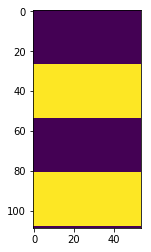

In [9]:
    listra = tamanho/4     #cria padrao com 4 listras
    tam_padrao = np.array((tamanho,tamanho/2)) #cria padrao com tamanho de 1 comprimento e metade de largura
    padrao = np.ones(tam_padrao, float)
    for i in xrange(listra):
        padrao[i::2*listra] = 0
    #padrao = puzzle[800:1000, 800:1000]    
    tam_padrao = np.array(padrao.shape[0:2]) 
    imshow(padrao)
    show()